In [1]:
print("hello mother")

hello mother


In [2]:
from PIL import Image
import numpy as np

def convert_to_grayscale_and_resize(image_path, new_size=(625, 100)):
    with Image.open(image_path) as img:

        # Convert the image to grayscale
        img_gray = img.convert("L")
        img_resized = img_gray.resize(new_size, Image.Resampling.LANCZOS)
        image_array = np.array(img_resized)

        return image_array


In [3]:
import cv2
import numpy as np
from scipy.ndimage import zoom

def resize_array(array, new_size):
    original_size = array.shape
    scale = [n / o for n, o in zip(new_size, original_size)]

    resized_array = zoom(array, zoom=scale, order=1)

    return resized_array

def mask_generator(tags, image_path):
    en_pix = tags.split()
    rle = list(map(int, en_pix))
    pixel = [rle[i] for i in range(0, len(rle), 2)]
    pixel_count = [rle[i] for i in range(1, len(rle), 2)]

    # Generate RLE pixels
    rle_pixels = [list(range(pixel[i], pixel[i] + pixel_count[i])) for i in range(len(pixel))]
    rle_mask_pixels = sum(rle_pixels, [])

    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image not found at {image_path}")

    # Get image dimensions
    l, b, _ = img.shape
    max_index = l * b - 1
    rle_mask_pixels = [min(pixel, max_index) for pixel in rle_mask_pixels]
    mask_img = np.zeros((l * b,), dtype=np.uint8)

    # Set pixels of interest to 1 (instead of 100)
    mask_img[rle_mask_pixels] = 1

    mask = mask_img.reshape((b, l)).T

    new_size = (625, 100)
    resized_array = cv2.resize(mask, new_size)

    return resized_array


In [13]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file

Saving yolo-dataset.zip to yolo-dataset (1).zip


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


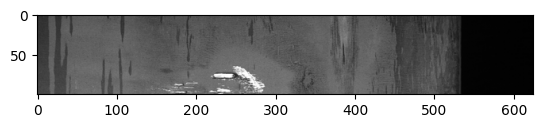

In [20]:
from matplotlib import pyplot
img = convert_to_grayscale_and_resize("/content/0a37f0a29.jpg", new_size=(625, 100))
pyplot.imshow(img, cmap=pyplot.get_cmap('gray'))


In [27]:
import pandas as pd
CSV_PATH = "/content/train.csv"
data = pd.read_csv(CSV_PATH, header=None)
image_path = data[0]
image_enpix = [f"/content/drive/MyDrive/Colab Notebooks/yolo-dataset/train_images/crazing_100.jpg" for image_name in data[0]]
train_x = np.array(image_enpix)
train_y= np.array(data[2])
image_dataset = np.delete(train_x, 0)
damage_dataset = np.delete(train_y, 0)
train_y = [mask_generator(damage, image) for damage, image in zip(damage_dataset, image_dataset)]

In [28]:
train_x = [convert_to_grayscale_and_resize(image_path, new_size=(625, 100)) for image_path in image_dataset]

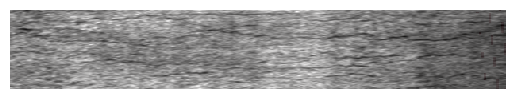

In [30]:
import numpy as np
import matplotlib.pyplot as plt


index_to_display = 0  # Choose an index within the range of your data (0-8)

# Check if the index is valid before accessing the list
if index_to_display < len(train_x):
    plt.imshow(train_x[index_to_display], cmap='gray', interpolation='none')

    plt.imshow(train_y[index_to_display], cmap='Reds', interpolation='none', alpha=0.09)

    plt.axis('off')
    plt.show()
else:
    print(f"Error: Index {index_to_display} is out of range for train_x (size: {len(train_x)})")

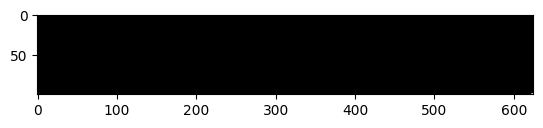

In [32]:
plt.imshow(train_y[8], cmap = "grey") # Changed the index to 8, the maximum valid index for a list of 9 elements

In [33]:
print(train_y[0][0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [34]:
print(train_x[0][0])

[126 123 118 111 104 100 102 104 107 110 111 111 110 107 103  97  94  94
 100 106 109 107 102 100 102 105 104  97  88  80  77  81  87  92  98 105
 114 124 134 144 151 154 148 137 124 111 105 102 102 102 103 106 111 116
 120 123 124 124 124 125 126 127 129 130 130 129 128 127 125 125 127 132
 136 135 129 120 115 116 121 126 128 125 122 118 116 114 112 110 110 112
 115 118 120 122 120 115 107 100  95  94  98 105 112 120 129 139 148 155
 159 159 156 151 147 142 138 133 130 131 132 134 136 137 136 137 137 137
 134 128 122 118 117 121 125 128 130 136 148 165 178 179 171 158 151 153
 160 168 173 174 172 166 160 155 153 155 160 168 177 183 186 184 178 169
 160 152 150 150 154 159 164 168 170 169 169 172 182 194 206 213 217 218
 216 212 206 200 193 187 183 181 179 178 175 173 170 168 166 164 162 160
 159 159 160 160 160 159 159 159 159 161 163 163 166 169 174 176 176 173
 166 155 142 132 132 142 156 164 161 154 149 153 165 179 189 198 202 204
 203 203 202 204 204 203 199 194 190 186 182 177 17

In [35]:
import numpy as np

def normalize_images(train_x):
    train_x = np.array(train_x, dtype=np.float32)
    train_x = train_x / 255.0

    return train_x

train_x = normalize_images(train_x)



In [36]:
print(train_x[0][0])

[0.49411765 0.48235294 0.4627451  0.43529412 0.40784314 0.39215687
 0.4        0.40784314 0.41960785 0.43137255 0.43529412 0.43529412
 0.43137255 0.41960785 0.40392157 0.38039216 0.36862746 0.36862746
 0.39215687 0.41568628 0.42745098 0.41960785 0.4        0.39215687
 0.4        0.4117647  0.40784314 0.38039216 0.34509805 0.3137255
 0.3019608  0.31764707 0.34117648 0.36078432 0.38431373 0.4117647
 0.44705883 0.4862745  0.5254902  0.5647059  0.5921569  0.6039216
 0.5803922  0.5372549  0.4862745  0.43529412 0.4117647  0.4
 0.4        0.4        0.40392157 0.41568628 0.43529412 0.45490196
 0.47058824 0.48235294 0.4862745  0.4862745  0.4862745  0.49019608
 0.49411765 0.49803922 0.5058824  0.50980395 0.50980395 0.5058824
 0.5019608  0.49803922 0.49019608 0.49019608 0.49803922 0.5176471
 0.53333336 0.5294118  0.5058824  0.47058824 0.4509804  0.45490196
 0.4745098  0.49411765 0.5019608  0.49019608 0.47843137 0.4627451
 0.45490196 0.44705883 0.4392157  0.43137255 0.43137255 0.4392157
 0.450980

In [37]:
print(len(train_y))
print(train_y[0].shape)
print(len(train_x))
print(train_x[0].shape)

9
(100, 625)
9
(100, 625)


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, Cropping2D
from tensorflow.keras.callbacks import History

# Define the U-Net model
def unet_model(input_shape=(100, 625, 1)):
    inputs = Input(shape=input_shape)

    # Contracting path (Downsampling)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    # Bottleneck
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)

    # Expansive path (Upsampling)
    up1 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv2)

    # Cropping conv1 to match the shape of up1
    cropped_conv1 = Cropping2D(cropping=((0, 0), (0, 1)))(conv1)

    # Skip connection with cropped conv1
    up1 = concatenate([up1, cropped_conv1])

    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
    conv3 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv3)

    # Output layer (Sigmoid for binary segmentation)
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv3)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Compile the model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 100, 625, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 100, 625, 32)   │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 100, 625, 32)   │          9,248 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 50, 312, 32)    │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 50, 312, 64)    │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 50, 312, 64)    │         36,928 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 100, 624, 32)   │          8,224 │ conv2d_3[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cropping2d (Cropping2D)   │ (None, 100, 624, 32)   │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 100, 624, 64)   │              0 │ conv2d_transpose[0][0… │
│                           │                        │                │ cropping2d[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 100, 624, 32)   │         18,464 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 100, 624, 32)   │          9,248 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 100, 624, 1)    │             33 │ conv2d_5[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 100,961 (394.38 KB)

 Trainable params: 100,961 (394.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 100, 625, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.3948 - loss: 0.6942 - val_accuracy: 1.0000 - val_loss: 0.6711
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9831 - loss: 0.6718 - val_accuracy: 1.0000 - val_loss: 0.6507
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9831 - loss: 0.6521 - val_accuracy: 1.0000 - val_loss: 0.6265
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.9831 - loss: 0.6287 - val_accuracy: 1.0000 - val_loss: 0.5919
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9831 - loss: 0.5953 - val_accuracy: 1.0000 - val_loss: 0.5408


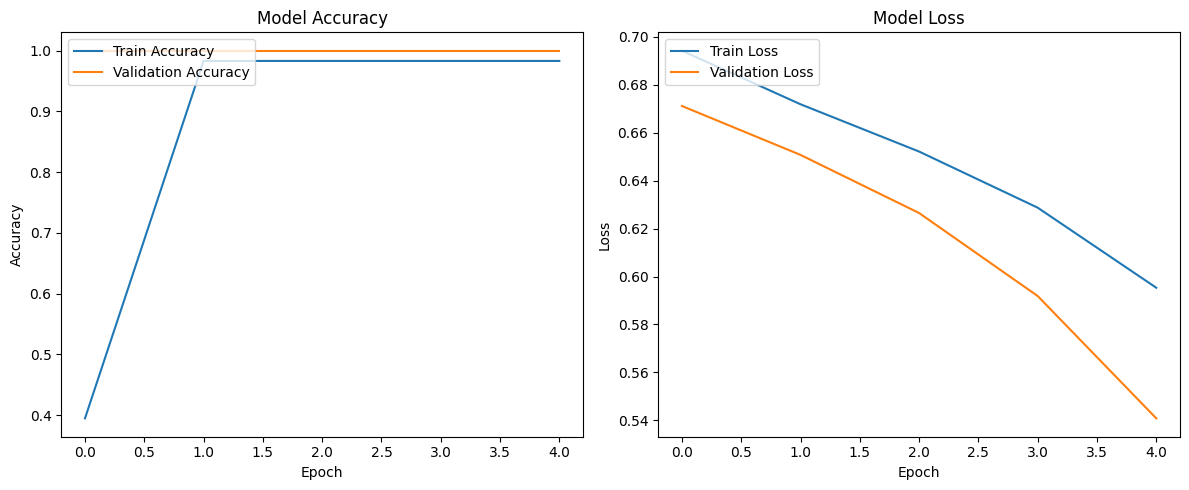

In [39]:

# Convert lists to NumPy arrays
train_x1 = np.array(train_x)
train_y1 = np.array(train_y)

# Reshape your data to fit the model
train_x2 = train_x1.reshape(-1, 100, 625, 1)
train_y2 = train_y1.reshape(-1, 100, 625, 1)

# Crop train_y_subset to match the output shape (100, 624, 1)
train_x_subset = train_x2[:1000]
train_y_subset = train_y2[:1000, :, :624, :]  # Crop width to 624

# Split the dataset into training and validation sets
split_index = int(0.8 * len(train_x_subset))
train_x, val_x = train_x_subset[:split_index], train_x_subset[split_index:]
train_y, val_y = train_y_subset[:split_index], train_y_subset[split_index:]

# Train the model and capture the history
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), batch_size=30, epochs=5)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 100, 625, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
[[0.48059487]
 [0.47153854]
 [0.45687038]
 [0.45862713]
 [0.45143867]
 [0.45948964]
 [0.45296216]
 [0.45987198]
 [0.4528646 ]
 [0.45931554]
 [0.4522805 ]
 [0.45889145]
 [0.45221916]
 [0.45908448]
 [0.45296666]
 [0.459989  ]
 [0.45455885]
 [0.46148467]
 [0.4565073 ]
 [0.46352005]
 [0.45890418]
 [0.46532673]
 [0.46002343]
 [0.46541893]
 [0.4583389 ]
 [0.46342748]
 [0.4555885 ]
 [0.46139678]
 [0.45419404]
 [0.4606394 ]
 [0.45417082]
 [0.46059826]
 [0.45431533]
 [0.4604154 ]
 [0.45442063]
 [0.4599341 ]
 [0.45397338]
 [0.45891413]
 [0.45235318]
 [0.457292  ]
 [0.4503523 ]
 [0.4561477 ]
 [0.44927135]
 [0.4562692 ]
 [0.44968632]
 [0.45701447]
 [0.45064184]
 [0.4580688 ]
 [0.45167333]
 [0.45873877]
 [0.45176464]
 [0.45832655]
 [0.45086706]
 [0.4573783 ]
 [0.45018643]
 [0.45683256]
 [0.45012397]
 [0.45687476]
 [0.4502411 ]
 [0.45700225]
 [0.44990522]
 [0.45654508]
 [0.44904947]
 [0.45580894]
 [0.4484028 ]
 [0.45548943]
 [0.4482097 ]
 [0.45541152]
 [0.44827

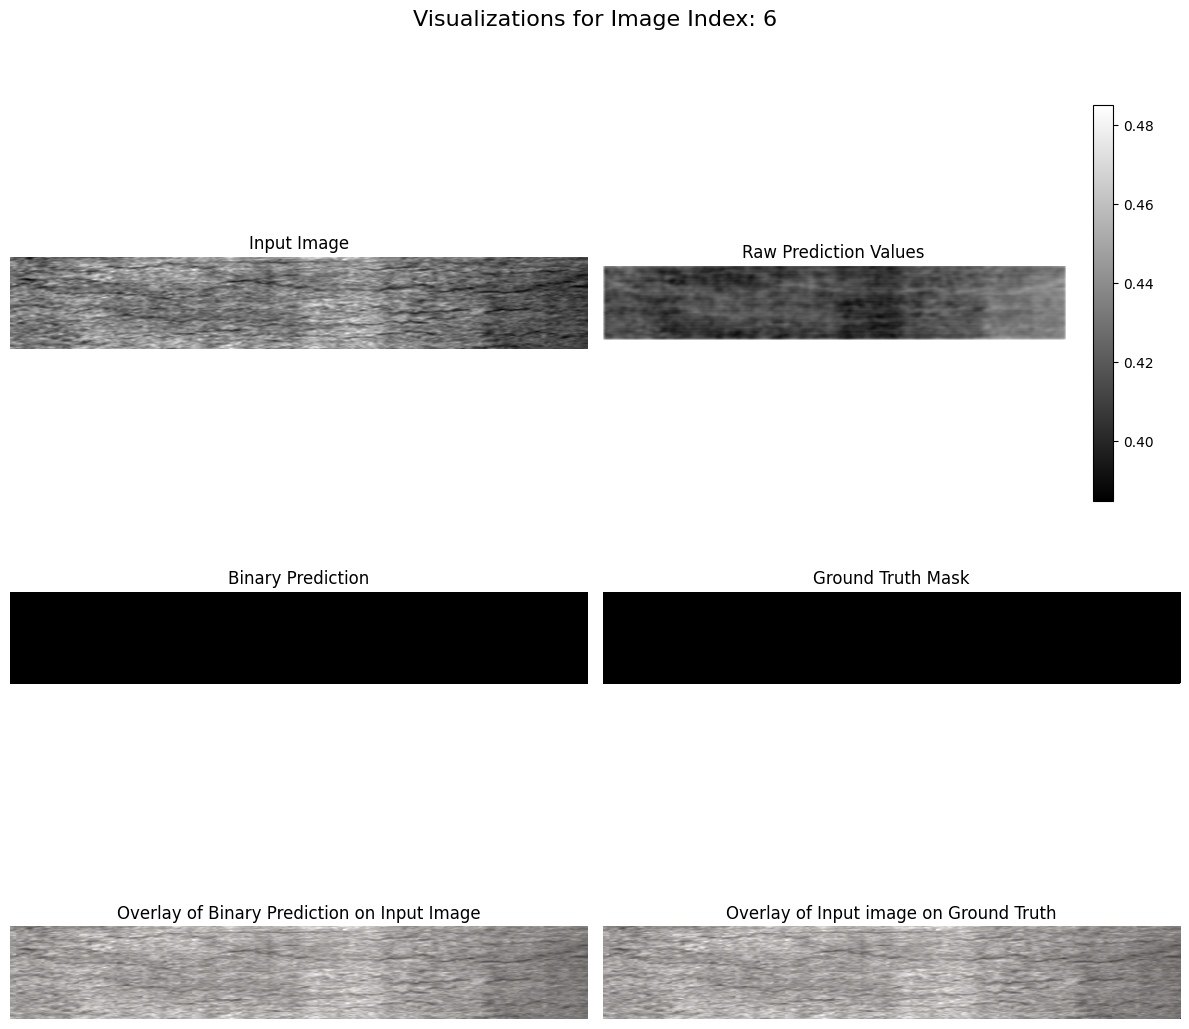

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, train_x, train_y, index):
    """
    Visualizes predictions of the model for a given index in the training data.

    Args:
        model: The trained Keras model.
        train_x: The training input data.
        train_y: The ground truth masks for the training data.
        index: The index of the data point to visualize.
    """
    # Check if the index is valid before accessing the list
    if index >= len(train_x):
        print(f"Error: Index {index} is out of range for train_x (size: {len(train_x)})")
        return

    # Prepare the sample input
    sample_input = np.expand_dims(train_x[index], axis=0)

    # Get the prediction
    prediction = model.predict(sample_input)
    print(prediction[0][0])

    # Create binary prediction
    binary_prediction = (prediction > 0.3).astype(int)

    # Set up the figure and axes
    fig, axs = plt.subplots(3, 2, figsize=(12, 12))
    fig.suptitle(f"Visualizations for Image Index: {index}", fontsize=16)

    # Input Image
    axs[0, 0].imshow(sample_input.reshape(100, 625), cmap="gray")
    axs[0, 0].set_title("Input Image")
    axs[0, 0].axis('off')

    # Raw Prediction
    raw_pred_img = axs[0, 1].imshow(np.squeeze(prediction), cmap="gray")
    axs[0, 1].set_title("Raw Prediction Values")
    fig.colorbar(raw_pred_img, ax=axs[0, 1])
    axs[0, 1].axis('off')

    # Binary Prediction
    axs[1, 0].imshow(np.squeeze(binary_prediction), cmap="gray")
    axs[1, 0].set_title("Binary Prediction")
    axs[1, 0].axis('off')

    # Ground Truth
    ground_truth = np.squeeze(train_y[index])  # Squeeze to remove the last dimension
    axs[1, 1].imshow(ground_truth, cmap="gray")
    axs[1, 1].set_title("Ground Truth Mask")
    axs[1, 1].axis('off')

    # Overlay Prediction on Input Image
    axs[2, 0].imshow(sample_input.reshape(100, 625), cmap="gray", interpolation='none')
    axs[2, 0].imshow(np.squeeze(binary_prediction), cmap="Reds", alpha=0.3)
    axs[2, 0].set_title("Overlay of Binary Prediction on Input Image")
    axs[2, 0].axis('off')

    # Input image on Ground Truth
    axs[2, 1].imshow(sample_input.reshape(100, 625), cmap="gray", interpolation='none')
    axs[2, 1].imshow(ground_truth, cmap="Reds", alpha=0.3)
    axs[2, 1].set_title("Overlay of Input image on Ground Truth")
    axs[2, 1].axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Example usage:
index_to_visualize = 6  # Change this to any index you want to visualize within the valid range (0-6)
visualize_predictions(model, train_x, train_y, index_to_visualize)

In [46]:
model.save('unet_model_full.h5', include_optimizer=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

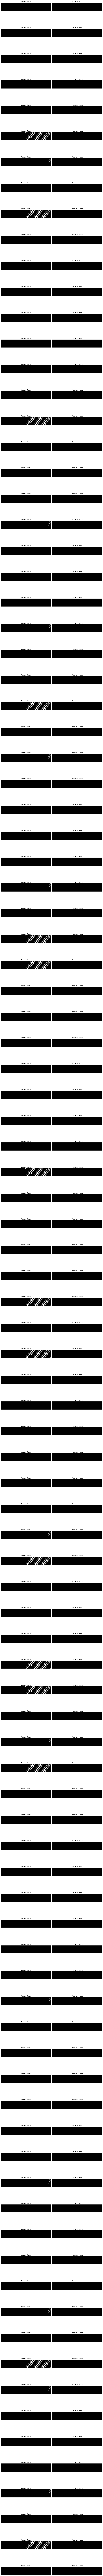

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

def visualize_batch_predictions(model, train_x, train_y, batch_size=100):
    predictions = []
    ground_truths = []

    for i in range(batch_size):
        index = np.random.randint(0, len(train_x))  # Randomly select an index
        sample_input = np.expand_dims(train_x[index], axis=0)
        prediction = model.predict(sample_input)

        # Store the raw and binary predictions
        predictions.append(prediction)

        # Get the ground truth
        ground_truth = train_y[index].squeeze()  # Remove any singleton dimensions
        ground_truths.append(ground_truth)

    # Convert lists to NumPy arrays
    predictions = np.array(predictions)  # Shape (batch_size, 1, 100, 624)
    ground_truths = np.array(ground_truths)  # Shape (batch_size, 100, 625)

    # Reshape predictions to match ground truth shape
    predictions = predictions.reshape(batch_size, 100, 624)

    # Ensure ground truths and predictions have the same last dimension
    if predictions.shape[2] != ground_truths.shape[2]:
        min_width = min(predictions.shape[2], ground_truths.shape[2])
        predictions = predictions[:, :, :min_width]  # Trim predictions if necessary
        ground_truths = ground_truths[:, :, :min_width]  # Trim ground truths if necessary

    # Calculate binary predictions
    binary_predictions = (predictions > 0.2).astype(int)

    # Calculate accuracy, precision, recall, and F1 score
    accuracy = np.mean(binary_predictions == ground_truths)
    precision = precision_score(ground_truths.flatten(), binary_predictions.flatten(), average='binary')
    recall = recall_score(ground_truths.flatten(), binary_predictions.flatten(), average='binary')
    f1 = f1_score(ground_truths.flatten(), binary_predictions.flatten(), average='binary')

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Set up the figure for visualizing
    fig, axs = plt.subplots(batch_size, 2, figsize=(12, 3 * batch_size))

    for i in range(batch_size):
        axs[i, 0].imshow(ground_truths[i], cmap="gray")
        axs[i, 0].set_title("Ground Truth")
        axs[i, 0].axis('off')

        axs[i, 1].imshow(binary_predictions[i], cmap="gray")
        axs[i, 1].set_title("Predicted Mask")
        axs[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
visualize_batch_predictions(model, train_x, train_y, batch_size=100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step


<Figure size 800x600 with 0 Axes>

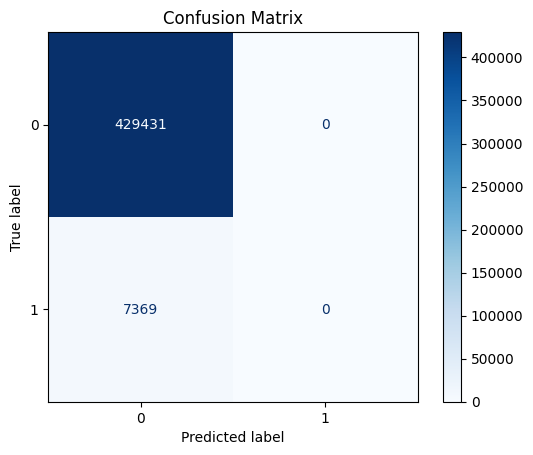

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, train_x, train_y, batch_size=100):
    # Ensure train_y is a NumPy array
    train_y_array = np.array(train_y)

    # Ensure batch_size does not exceed the number of samples
    batch_size = min(batch_size, len(train_x))  # This line is added

    # Make predictions
    predictions = []
    for i in range(batch_size):
        sample_input = np.expand_dims(train_x[i], axis=0)
        prediction = model.predict(sample_input)
        binary_prediction = (prediction > 0.5).astype(int)
        predictions.append(binary_prediction)

    # Convert to a single array
    predictions = np.array(predictions).reshape(batch_size, -1)

    # Reshape ground truths to match predictions
    ground_truths = train_y_array[:batch_size].reshape(batch_size, -1)

    # Make sure both predictions and ground truths have the same shape
    if predictions.shape[1] != ground_truths.shape[1]:
        min_length = min(predictions.shape[1], ground_truths.shape[1])
        predictions = predictions[:, :min_length]
        ground_truths = ground_truths[:, :min_length]

    # Calculate confusion matrix
    cm = confusion_matrix(ground_truths.flatten(), predictions.flatten())

    # Create a confusion matrix display
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# Example usage
plot_confusion_matrix(model, train_x, train_y, batch_size=100)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 100, 625, 1))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step


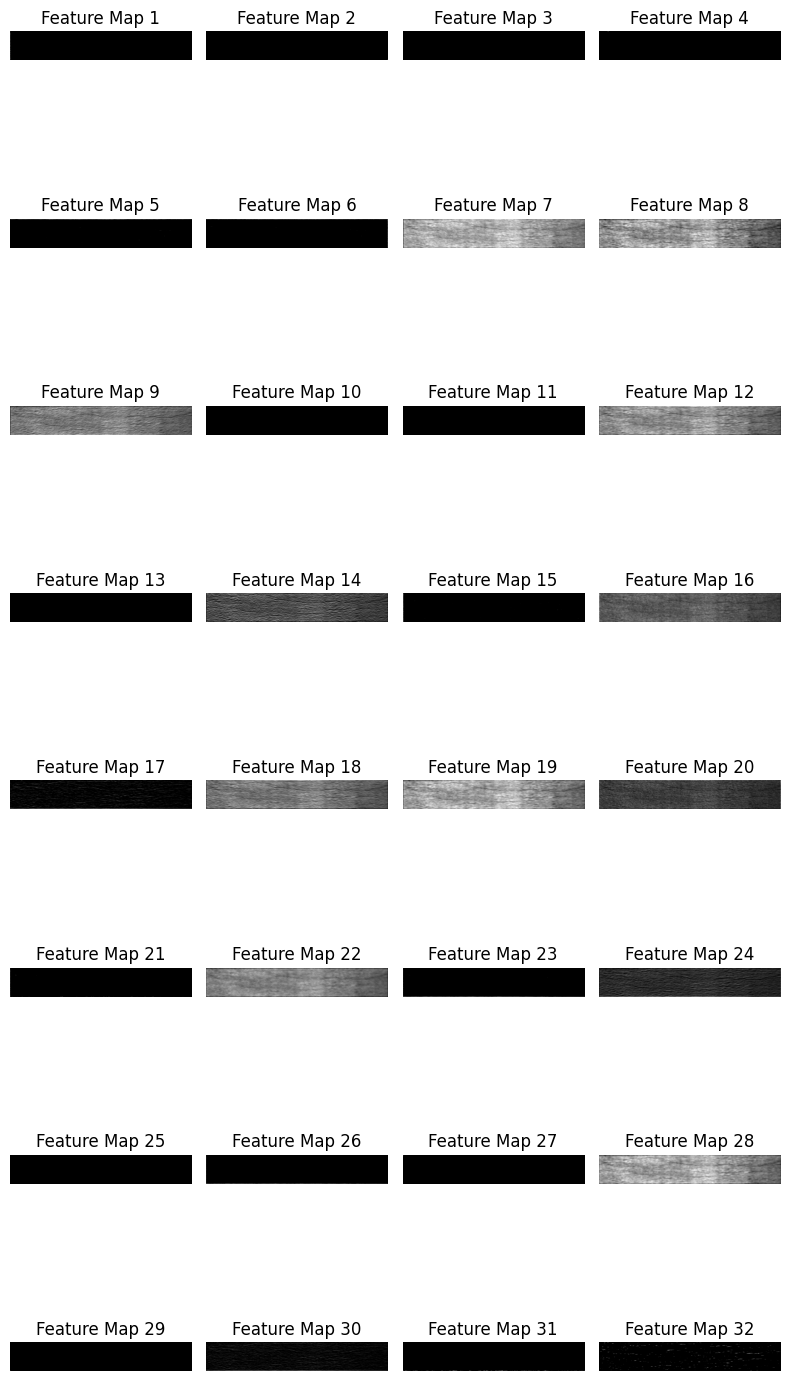

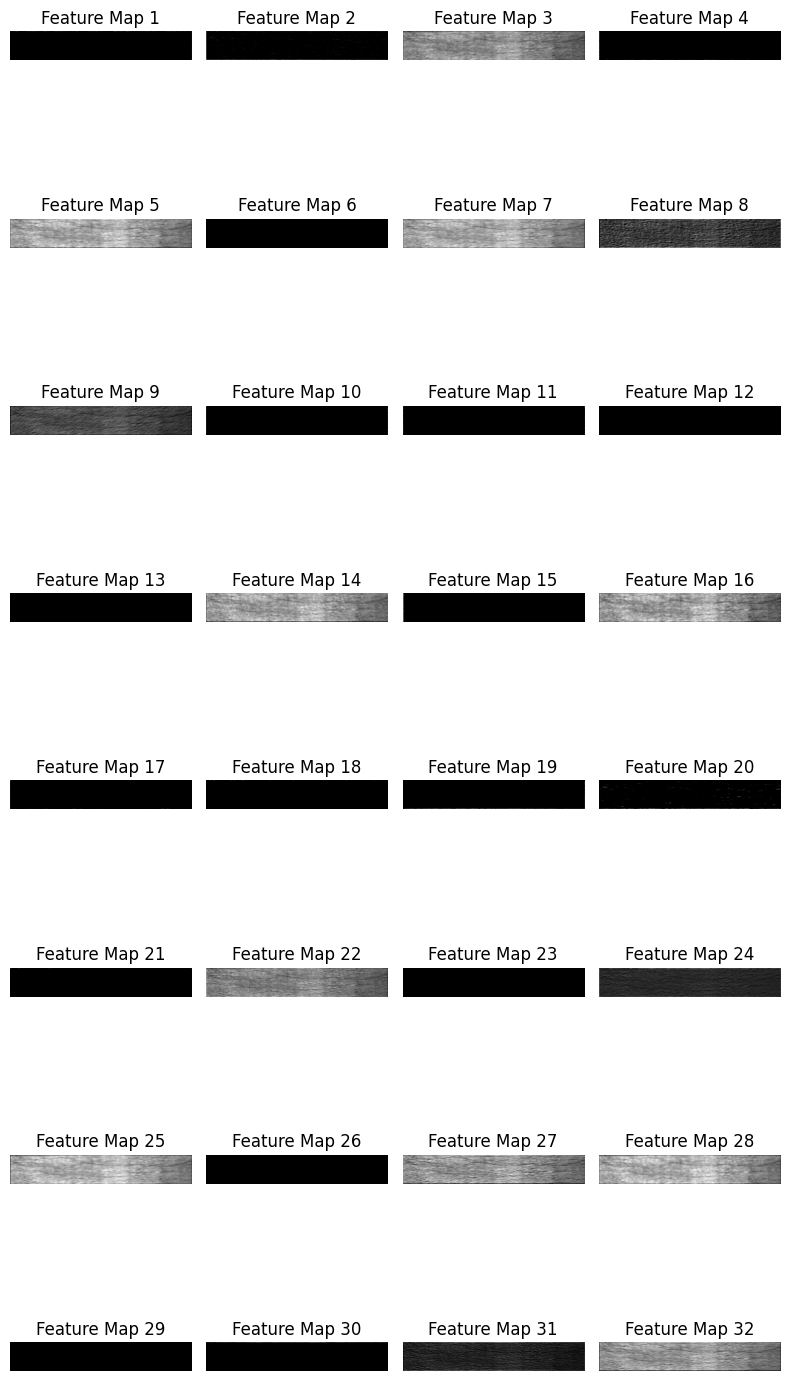

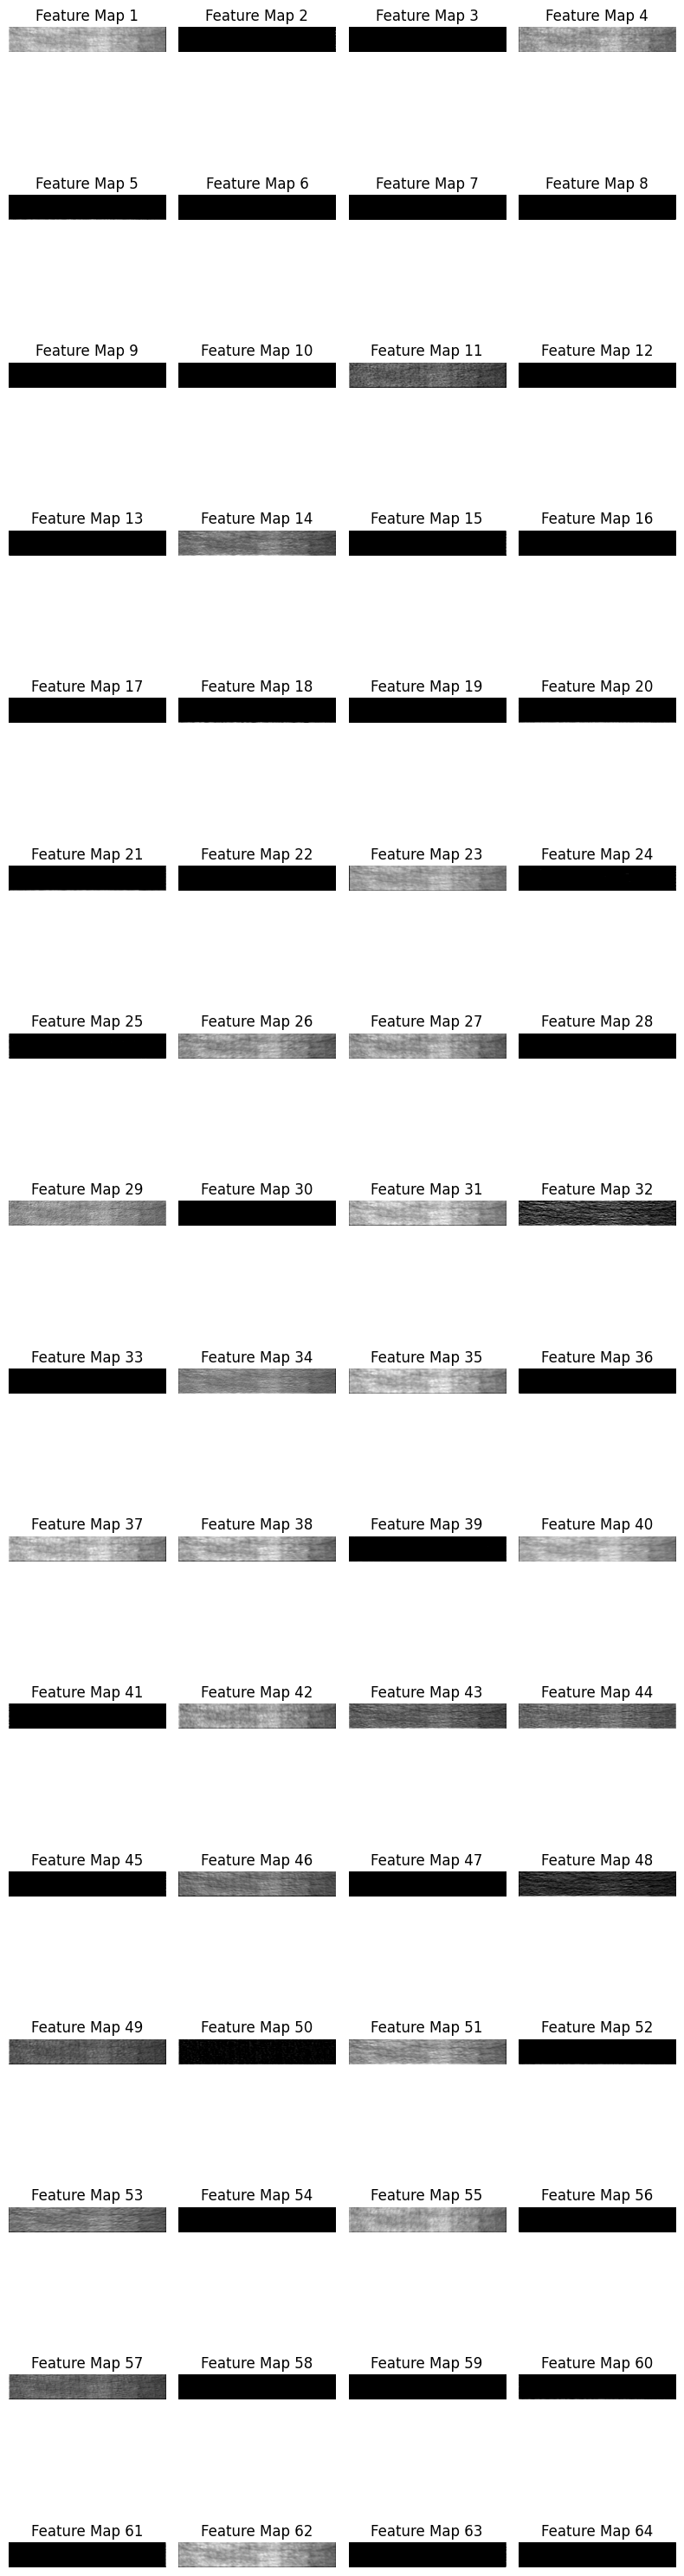

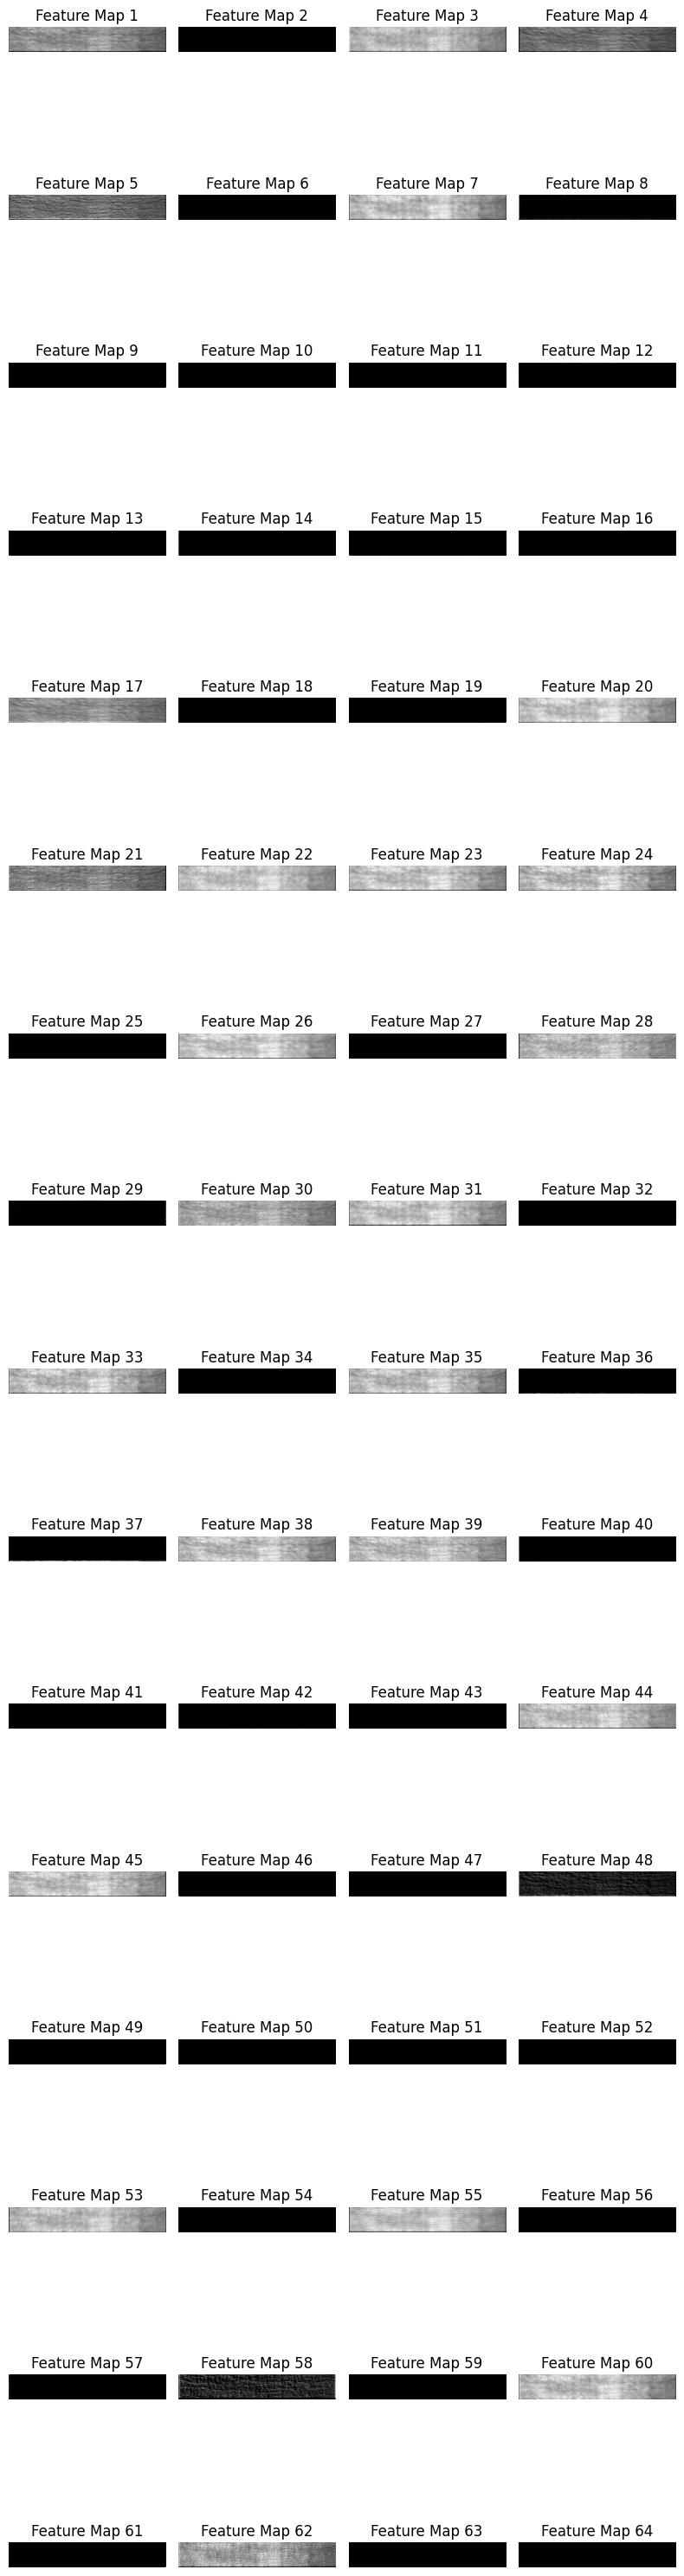

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

def get_feature_maps(model, layer_names, input_data):
    # Create a new model that will output the desired layers
    feature_maps_model = Model(inputs=model.input, outputs=[model.get_layer(name).output for name in layer_names])

    # Get feature maps for the input data
    feature_maps = feature_maps_model.predict(input_data)
    return feature_maps

def plot_feature_maps(feature_maps, num_columns=4):
    for i, fmap in enumerate(feature_maps):
        num_features = fmap.shape[-1]
        size = fmap.shape[1]  # Assuming square feature maps

        # Create a grid to display the feature maps
        num_rows = num_features // num_columns + (num_features % num_columns > 0)
        plt.figure(figsize=(num_columns * 2, num_rows * 2))

        for j in range(num_features):
            plt.subplot(num_rows, num_columns, j + 1)
            plt.imshow(fmap[0, :, :, j], cmap='gray')
            plt.axis('off')
            plt.title(f'Feature Map {j + 1}')

        plt.tight_layout()
        plt.show()

# Example usage
# Updated layer names to match the model summary
layer_names = ['conv2d', 'conv2d_1', 'conv2d_2', 'conv2d_3']
sample_input = np.expand_dims(train_x[6], axis=0)
feature_maps = get_feature_maps(model, layer_names, sample_input)
plot_feature_maps(feature_maps)

In [53]:
model.save('/content/unet_model_full.h5')
